In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [7]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (14,12)

In [69]:
data = pd.read_csv('bases/questao1_coronavirus.csv',sep=';',parse_dates=[0])
data['date']=data['date'].map(lambda x: x.date())
data.head()

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
0,2020-06-21,AC,Acrelândia,0,0,15256.0
1,2020-06-21,AC,Assis Brasil,0,0,7417.0
2,2020-06-21,AC,Brasiléia,0,0,26278.0
3,2020-06-21,AC,Bujari,4,0,10266.0
4,2020-06-21,AC,Capixaba,5,1,11733.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240649 entries, 0 to 240648
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       240649 non-null  object 
 1   state                      240649 non-null  object 
 2   city                       240649 non-null  object 
 3   new_confirmed              240649 non-null  int64  
 4   new_deaths                 240649 non-null  int64  
 5   estimated_population_2019  239206 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.0+ MB


In [73]:
data.isnull().sum()

date                            0
state                           0
city                            0
new_confirmed                   0
new_deaths                      0
estimated_population_2019    1443
dtype: int64

In [74]:
data[data['estimated_population_2019'].isnull()]

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
57,2020-06-21,AL,Importados/Indefinidos,3,0,NaN
347,2020-06-21,BA,Importados/Indefinidos,-324,0,NaN
656,2020-06-21,CE,Importados/Indefinidos,4,0,NaN
765,2020-06-21,DF,Importados/Indefinidos,-67,-1,NaN
799,2020-06-21,ES,Importados/Indefinidos,0,0,NaN
...,...,...,...,...,...,...
240347,2020-03-18,PE,Importados/Indefinidos,1,0,NaN
240415,2020-03-17,PE,Importados/Indefinidos,1,0,NaN
240461,2020-03-16,PE,Importados/Indefinidos,0,0,NaN
240497,2020-03-15,PE,Importados/Indefinidos,0,0,NaN


In [75]:
data[data['city'] == 'Importados/Indefinidos']

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
57,2020-06-21,AL,Importados/Indefinidos,3,0,NaN
347,2020-06-21,BA,Importados/Indefinidos,-324,0,NaN
656,2020-06-21,CE,Importados/Indefinidos,4,0,NaN
765,2020-06-21,DF,Importados/Indefinidos,-67,-1,NaN
799,2020-06-21,ES,Importados/Indefinidos,0,0,NaN
...,...,...,...,...,...,...
240347,2020-03-18,PE,Importados/Indefinidos,1,0,NaN
240415,2020-03-17,PE,Importados/Indefinidos,1,0,NaN
240461,2020-03-16,PE,Importados/Indefinidos,0,0,NaN
240497,2020-03-15,PE,Importados/Indefinidos,0,0,NaN


In [76]:
all(data[data['estimated_population_2019'].isnull()].index == data[data['city'] == 'Importados/Indefinidos'].index)

True

### Onde a população estimada é nula, os dados da coluna cidade são inconsistentes.

In [77]:
index = data[data['estimated_population_2019'].isnull()].index
data = data.drop(index,axis=0)

In [78]:
data.describe()

,new_confirmed,new_deaths,estimated_population_2019
count,239206.000000,239206.000000,2.392060e+05
mean,4.478780,0.211061,6.837236e+04
std,46.292735,2.918543,3.526757e+05
min,-4289.000000,-131.000000,8.370000e+02
25%,0.000000,0.000000,8.739000e+03
50%,0.000000,0.000000,1.897700e+04
75%,1.000000,0.000000,4.289200e+04
max,6877.000000,227.000000,1.225202e+07


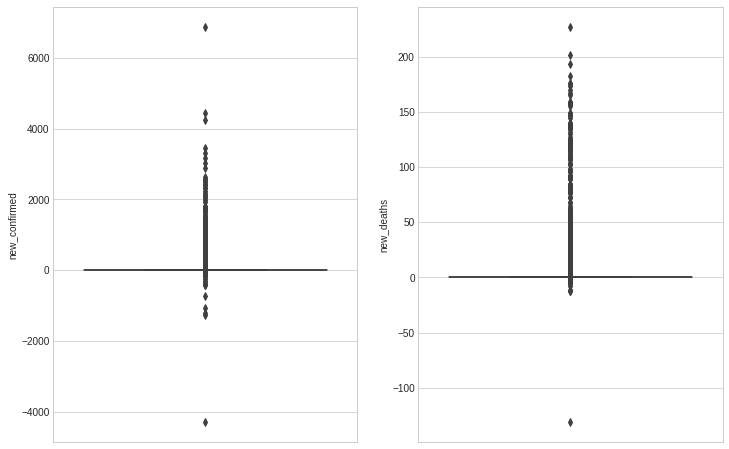

In [79]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(data['new_confirmed'],orient='v',ax=ax[0])
sns.boxplot(data['new_deaths'],orient='v',ax=ax[1])
plt.show()

In [80]:
data[data['new_confirmed'] < 0]

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
547,2020-06-21,BA,Tanhaçu,-1,0,20403.0
593,2020-06-21,CE,Ararendá,-1,0,10935.0
606,2020-06-21,CE,Beberibe,-3,0,53573.0
619,2020-06-21,CE,Cascavel,-2,0,71743.0
629,2020-06-21,CE,Crato,-1,0,132123.0
...,...,...,...,...,...,...
240000,2020-03-21,MG,Juiz de Fora,-1,0,568873.0
240148,2020-03-20,MG,Uberlândia,-1,0,691305.0
240308,2020-03-19,SP,Santo André,-4,0,718773.0
240310,2020-03-19,SP,São Caetano do Sul,-5,0,161127.0


In [81]:
data[data['new_deaths'] < 0]

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
764,2020-06-21,DF,Brasília,-1269,-8,3015268.0
4634,2020-06-21,SP,Praia Grande,7,-1,325073.0
5561,2020-06-20,CE,Crateús,31,-1,75074.0
5570,2020-06-20,CE,Fortaleza,263,-4,2669342.0
5582,2020-06-20,CE,Horizonte,22,-1,67337.0
...,...,...,...,...,...,...
236301,2020-04-02,CE,Fortaleza,113,-6,2669342.0
236314,2020-04-02,CE,Santa Quitéria,0,-1,43703.0
236316,2020-04-02,CE,Tianguá,1,-1,75946.0
236737,2020-04-02,SP,São Sebastião,0,-1,88980.0


In [82]:
#Substitui onde a condição é falsa.
data['new_confirmed'] = data['new_confirmed'].where(data['new_confirmed']>=0,0)
data['new_deaths'] = data['new_deaths'].where(data['new_deaths']>=0,0)

### Casos confirmados e mortes negativas são substituídos por 0

In [83]:
data.to_csv('q1/data/pre_processed_data.csv',index=False)


In [5]:
data = pd.read_csv('q1/data/pre_processed_data.csv',parse_dates=[0])

## Números de casos acumulados


In [84]:
casos_brasil = data.groupby(['date']).sum()
casos_brasil.to_csv('q1/data/casos_brasil_por_data.csv')

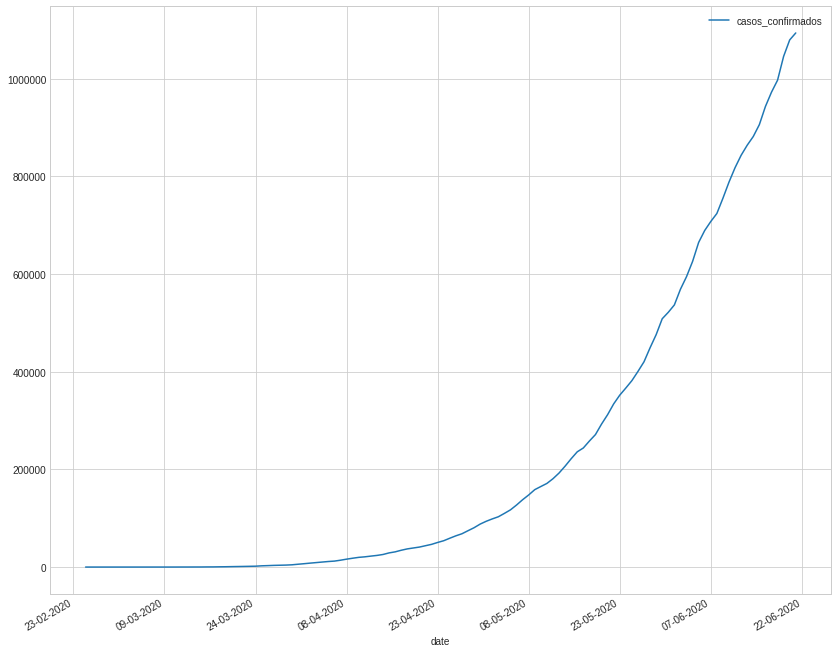

In [85]:
index = casos_brasil.index
value = grupo['new_confirmed'].values.cumsum()
df = pd.DataFrame(data=value,index=index,columns=['casos_confirmados'])

ax = df.plot()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

### Por estado

In [86]:
grupo = data.groupby(['date','state']).sum()
grupo

new_confirmed  new_deaths  estimated_population_2019
date       state                                                      
2020-02-25 SP                 1           0                 12252023.0
2020-02-26 SP                 0           0                 12252023.0
2020-02-27 SP                 0           0                 12252023.0
2020-02-28 SP                 1           0                 12252023.0
2020-02-29 SP                 0           0                 12252023.0
...                         ...         ...                        ...
2020-06-21 RS               210           4                 10889704.0
           SC               481           9                  7054102.0
           SE               537          14                  2298696.0
           SP              3412          95                 45748682.0
           TO                 0           0                  1528801.0

[2711 rows x 3 columns]

In [87]:
dates = grupo.index.get_level_values('date')
grupo.index = grupo.index.get_level_values('state')
grupo['date'] = dates
grupo.reset_index(inplace=True)
grupo.drop('estimated_population_2019',axis=1,inplace=True)
grupo

,state,new_confirmed,new_deaths,date
0,SP,1,0,2020-02-25
1,SP,0,0,2020-02-26
2,SP,0,0,2020-02-27
3,SP,1,0,2020-02-28
4,SP,0,0,2020-02-29
...,...,...,...,...
2706,RS,210,4,2020-06-21
2707,SC,481,9,2020-06-21
2708,SE,537,14,2020-06-21
2709,SP,3412,95,2020-06-21


In [88]:
grupo.to_csv('q1/data/casos_mortes_por_estado.csv',index=False)

0.04673446588006414

## Número de mortes acumuladas

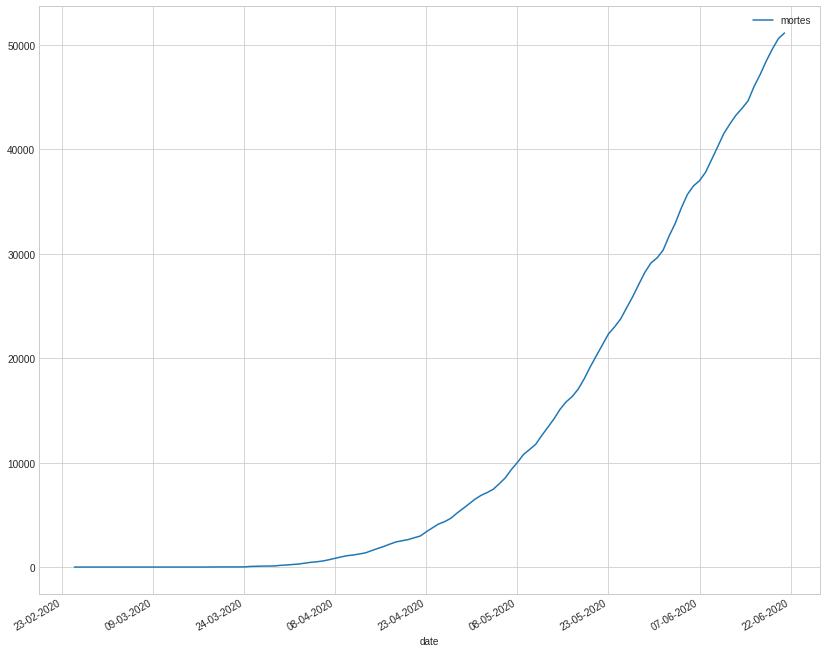

In [89]:
grupo = data.groupby(['date']).sum()
grupo
index = grupo.index
value = grupo['new_deaths'].values.cumsum()
df = pd.DataFrame(data=value,index=index,columns=['mortes'])

ax = df.plot()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

## Porcentagem de mortes sobre infectados


In [90]:
grupo_mortes = data.groupby('state').sum()
grupo_mortes = grupo_mortes[['new_confirmed','new_deaths']]
grupo_mortes

,new_confirmed,new_deaths
state,,
AC,18108,472
AL,28699,882
AM,63707,2673
AP,21840,359
BA,45918,1393
CE,91454,5610
DF,28746,370
ES,34490,1331
GO,16223,318


In [91]:
data

,date,state,city,new_confirmed,new_deaths,estimated_population_2019
0,2020-06-21,AC,Acrelândia,0,0,15256.0
1,2020-06-21,AC,Assis Brasil,0,0,7417.0
2,2020-06-21,AC,Brasiléia,0,0,26278.0
3,2020-06-21,AC,Bujari,4,0,10266.0
4,2020-06-21,AC,Capixaba,5,1,11733.0
...,...,...,...,...,...,...
240644,2020-02-29,SP,São Paulo,0,0,12252023.0
240645,2020-02-28,SP,São Paulo,1,0,12252023.0
240646,2020-02-27,SP,São Paulo,0,0,12252023.0
240647,2020-02-26,SP,São Paulo,0,0,12252023.0


In [92]:
grupo_mortes['taxa_de_mortes'] = grupo_mortes['new_deaths']/grupo_mortes['new_confirmed']
grupo_mortes

,new_confirmed,new_deaths,taxa_de_mortes
state,,,
AC,18108,472,0.026066
AL,28699,882,0.030733
AM,63707,2673,0.041958
AP,21840,359,0.016438
BA,45918,1393,0.030337
CE,91454,5610,0.061342
DF,28746,370,0.012871
ES,34490,1331,0.038591
GO,16223,318,0.019602


In [93]:
grupo_mortes.to_csv('q1/data/taxa_de_mortes.csv')

## Porcentagem da população já infectada


In [94]:
data_cities = data[['state','city','estimated_population_2019']]
data_cities = data_cities.set_index('city')
data_cities = data_cities.loc[~data_cities.index.duplicated(keep='first')]
data_cities

,state,estimated_population_2019
city,,
Acrelândia,AC,15256.0
Assis Brasil,AC,7417.0
Brasiléia,AC,26278.0
Bujari,AC,10266.0
Capixaba,AC,11733.0
...,...,...
Talismã,TO,2793.0
Tocantínia,TO,7545.0
Tocantinópolis,TO,22870.0


In [95]:
grupo_infec = data_cities.groupby('state').sum()
grupo_infec

,estimated_population_2019
state,
AC,881935.0
AL,3337357.0
AM,4094875.0
AP,845731.0
BA,14411952.0
CE,9104566.0
DF,3015268.0
ES,4018650.0
GO,6729774.0


In [97]:
grupo_infec['taxa_da_população_infectada'] = grupo_mortes['new_confirmed']/grupo_infec['estimated_population_2019']
grupo_infec

,estimated_population_2019,taxa_da_população_infectada
state,,
AC,881935.0,0.020532
AL,3337357.0,0.008599
AM,4094875.0,0.015558
AP,845731.0,0.025824
BA,14411952.0,0.003186
CE,9104566.0,0.010045
DF,3015268.0,0.009533
ES,4018650.0,0.008582
GO,6729774.0,0.002411


In [98]:
grupo_infec.to_csv('q1/data/taxa_de_infec.csv')